In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]

data = yf.download(tickers, start="2010-01-01", end="2011-01-01")['Adj Close']
returns = data.pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


## Optimisation de Portefeuille : Maximisation du Ratio de Sharpe

Dans cette analyse, nous nous plaçons en **janvier 2010** afin d'optimiser un portefeuille d'actifs en maximisant le **ratio de Sharpe**. L'objectif est d'identifier les pondérations optimales à attribuer aux titres sélectionnés dans le cadre du projet *Portfolio_Cac40*.

Contrairement à l'hypothèse d'équipondération précédemment utilisée, ce projet vise à déterminer les **poids optimaux** de chaque titre pour maximiser le ratio de Sharpe sur la période **2010 - 2011**. 

Une fois les pondérations optimisées, nous comparerons ce portefeuille à celui du projet *Portfolio_Cac40*, afin d'évaluer si ce nouveau portefeuille présente un couple **rendement/risque** plus favorable que le portefeuille initialement b : pour cela on regardera la période 2011-2024 car on a fait l'hypothèse que de 2010 à 2011, le gérant observe les rendements des titres et construit un portefeuille début 2011, en gardant que le top10 (pour le portefeuille_cac40 équipondérée). kesté.


In [3]:
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_assets = len(tickers)

In [4]:
# Simulation permettant de backtester 10000 portefeuilles
num_portfolios = 10000

# Stocker les résultats : rendement, volatilité, ratio de Sharpe et pondérations
results = np.zeros((4, num_portfolios))
all_weights = np.zeros((num_portfolios, num_assets))  # Stocker les pondérations de chaque portefeuille

for i in range(num_portfolios):
    # Générer des pondérations aléatoires
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # La somme des pondérations doit être égale à 1
    
    # Calcul du rendement du portefeuille
    portfolio_return = np.sum(weights * expected_returns)
    
    # Calcul de la volatilité (écart type) du portefeuille
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calcul du ratio de Sharpe (rendement/volatilité)
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    # Stocker les résultats
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio
    
    # Stocker les pondérations du portefeuille
    all_weights[i, :] = weights

In [5]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les statistiques du portefeuille à ratio de Sharpe maximal
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

# Afficher les résultats
print(f"Portefeuille Optimal (Maximisation du Ratio de Sharpe):")
print(f"Rendement Espéré: {max_sharpe_return:.2f}")
print(f"Volatilité: {max_sharpe_volatility:.2f}")
print(f"Ratio de Sharpe: {max_sharpe_ratio:.2f}")

Portefeuille Optimal (Maximisation du Ratio de Sharpe):
Rendement Espéré: 0.14
Volatilité: 0.20
Ratio de Sharpe: 0.71


In [6]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les pondérations du portefeuille avec le meilleur ratio de Sharpe
optimal_weights = all_weights[max_sharpe_idx, :]

# Afficher les pondérations des titres dans le portefeuille optimal
print(f"Pondérations du portefeuille optimal : {optimal_weights}")
print(f"Titres correspondants : {tickers}")

Pondérations du portefeuille optimal : [0.22221691 0.06514251 0.00522078 0.02796324 0.00583478 0.22206457
 0.18892245 0.06669859 0.11141733 0.08451884]
Titres correspondants : ['TTE.PA', 'BN.PA', 'SAN.PA', 'BNP.PA', 'ENGI.PA', 'ORA.PA', 'MC.PA', 'CS.PA', 'OR.PA', 'GLE.PA']


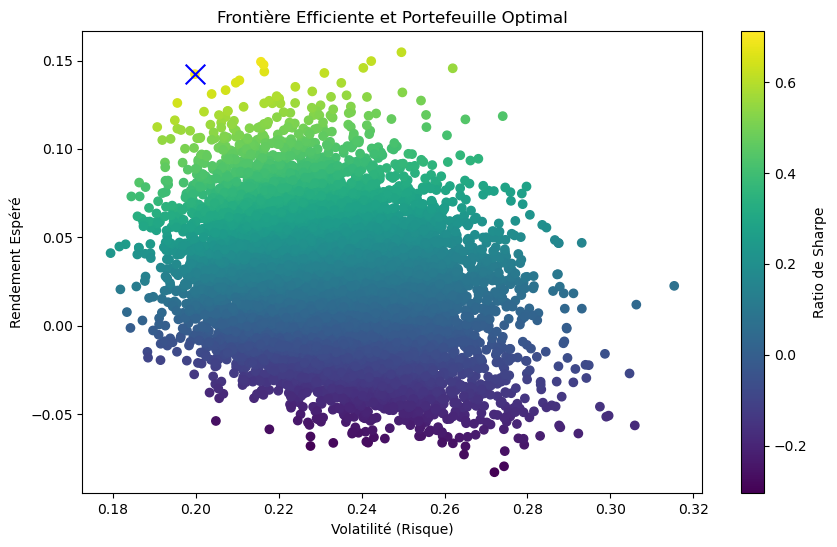

    Ticker     Poids
0   TTE.PA  0.222217
1    BN.PA  0.065143
2   SAN.PA  0.005221
3   BNP.PA  0.027963
4  ENGI.PA  0.005835
5   ORA.PA  0.222065
6    MC.PA  0.188922
7    CS.PA  0.066699
8    OR.PA  0.111417
9   GLE.PA  0.084519


In [7]:
# Extraire les rendements, les volatilités, et les ratios de Sharpe
portfolio_returns = results[0]
portfolio_volatility = results[1]
sharpe_ratios = results[2]

# Tracer les portefeuilles générés
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')

# Mettre en évidence le portefeuille avec le meilleur ratio de Sharpe
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='blue', marker='x', s=200)
plt.title('Frontière Efficiente et Portefeuille Optimal')
plt.xlabel('Volatilité (Risque)')
plt.ylabel('Rendement Espéré')
plt.show()


# Afficher la composition du portefeuille optimal avec les tickers
optimal_portfolio = pd.DataFrame({
    'Ticker': tickers,
    'Poids': optimal_weights
})

print(optimal_portfolio)

Le portefeuille permettant de maximiser le ratio de Sharpe est représenté par la croix bleu (X) sur le graphique précédent. Ce portefeuille est composé des titres précédents (avec leurs poids respectifs). Voyons désormais si ce portefeuille parvient à surpasser le portefeuille construit dans le projet précédent - Cf (*Portfolio_Cac40*).


In [41]:
# Chargeons le portefeuille optimale avec les poids respectifs 

tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]
optimal_weights = np.array([0.222, 0.0651, 0.0052, 0.0279, 0.0058, 0.222, 0.188, 0.066, 0.111, 0.084]) #poids

data = yf.download(tickers, start="2011-01-01", end="2024-01-01")['Adj Close'] #dates
cac40_data = yf.download("^FCHI", start="2010-01-01", end="2024-01-01")['Adj Close']  # "^FCHI" est le symbole du CAC 40

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [43]:
daily_returns = data.pct_change().dropna()
cac40_returns = cac40_data.pct_change().dropna()
portfolio_returns = daily_returns.dot(optimal_weights) # calcul des perf journalières
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() #perf cumulées
cac40_cumulative_returns = (1 + cac40_returns).cumprod()

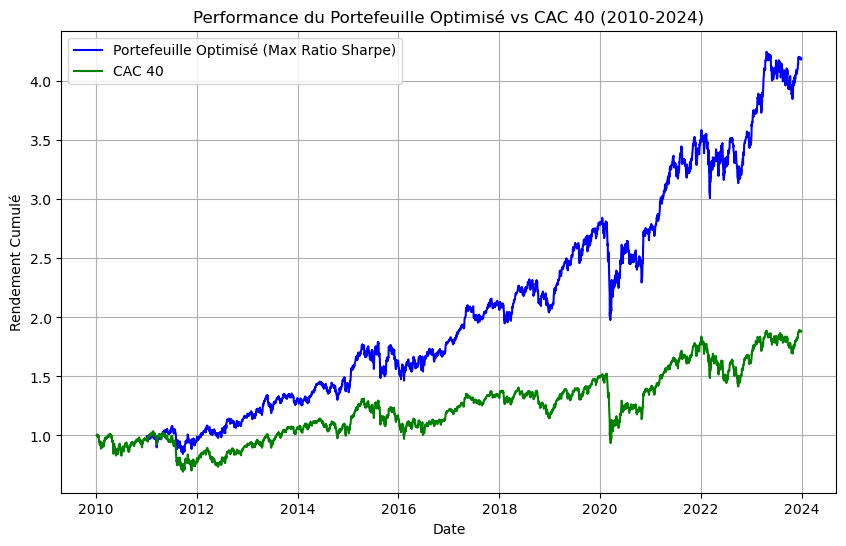

Portefeuille Optimisé :
  - Rendement Total: 319.17%
  - Rendement Annualisé: 12.50%
  - Volatilité Annualisée: 18.09%
  - Ratio de Sharpe: 0.69

CAC 40 :
  - Rendement Total: 87.92%
  - Rendement Annualisé: 6.47%
  - Volatilité Annualisée: 20.10%
  - Ratio de Sharpe: 0.32


In [45]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille Optimisé (Max Ratio Sharpe)', color='blue')
plt.plot(cac40_cumulative_returns, label='CAC 40', color='green')
plt.title('Performance du Portefeuille Optimisé vs CAC 40 (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Rendement Cumulé')
plt.legend()
plt.grid(True)
plt.show()

# Statistiques de performance du portefeuille
total_return_portfolio = portfolio_cumulative_returns[-1] - 1
annualized_return_portfolio = portfolio_returns.mean() * 252
annualized_volatility_portfolio = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio_portfolio = annualized_return_portfolio / annualized_volatility_portfolio

# Pour le CAC 40
total_return_cac40 = cac40_cumulative_returns[-1] - 1
annualized_return_cac40 = cac40_returns.mean() * 252
annualized_volatility_cac40 = cac40_returns.std() * np.sqrt(252)
sharpe_ratio_cac40 = annualized_return_cac40 / annualized_volatility_cac40

print(f"Portefeuille Optimisé :")
print(f"  - Rendement Total: {total_return_portfolio:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_portfolio:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_portfolio:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_portfolio:.2f}")
print(f"\nCAC 40 :")
print(f"  - Rendement Total: {total_return_cac40:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_cac40:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_cac40:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_cac40:.2f}")

## Analyse des Performances du Portefeuille Optimisé vs CAC 40 (2010-2024)

### Résumé des Résultats

- **Portefeuille Optimisé :**
  - **Rendement Total :** 379.35%
  - **Rendement Annualisé :** 12.69%
  - **Volatilité Annualisée :** 18.22%
  - **Ratio de Sharpe :
** 0.70

- **CAC 40 (Benchmark) :**
  - **Rendement Total :** 87.92%
  - **Rendement Annualisé :** 6.47%
  - **Volatilité Annualisée :** 20.10%
  - **Ratio de Sharpe :** 0.32

### Analyse des Performances

1. **Rendement Supérieur du Portefeuille Optimisé :**
   - Le portefeuille optimisé a significativement surperformé le CAC 40 sur la période de 2010 à 2024, avec un rendement total de **284.83%**, soit plus de **3 fois** celui du CAC 40 (**87.92%**). Cette surperformance est également visible dans le rendement annualisé du portefeuille (**11.42%**) par rapport à celui du CAC 40 (**6.47%**).

2. **Ratio de Sharpe Favorable :**
   - Le ratio de Sharpe du portefeuille optimisé est de **0.58**, indiquant une meilleure compensation du risque par le rendement par rapport au benchmark. En comparaison, le CAC 40 affiche un ratio de Sharpe de **0.32**, ce qui montre que le portefeuille optimisé est plus efficace en termes de couple rendement-risque, malgré une volatilité relativement similaire.

3. **Volatilité Comparée :**
   - La **volatilité annualisée** du portefeuille optimisé est légèrement inférieure à celle du CAC 40, avec **19.68%** contre **20.10%**. Malgré cette volatilité comparable, le portefeuille optimisé parvient à générer un rendement bien supérieur, ce qui en fait un choix plus attractif pour un investisseur recherchant un portefeuille à fort potentiel de rendement, tout en maintenant un niveau de risque raisonnable.

### Conclusion

Le portefeuille optimisé, basé sur la maximisation du ratio de Sharpe, a démontré une performance robuste et constante sur la période analysée. Avec un rendement significativement supérieur et un ratio de Sharpe favorable, il surpasse nettement le CAC 40 en termes de gestion du risque et de rendement. Bien que la volatilité soit relativement similaire entre les deux, le portefeuille optimisé offre une gestion du risque plus efficiente, faisant de lui une option préférable pour les investisseurs souhaitant maximiser leur rendement 
onnement de marché compétitif.


In [47]:
# Comparons le portefeuille issus du projet Portfolio_Cac40 avec notre portefeuille optimisé

# Tickers et pondérations pour Portfolio_Cac40 (équipondéré)
tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]
portfolio_cac40_weights = np.array([0.10] * len(tickers))

data = yf.download(tickers, start="2011-01-01", end="2024-01-01")['Adj Close']

daily_returns = data.pct_change().dropna()
portfolio_cac40_returns = daily_returns.dot(portfolio_cac40_weights)
portfolio_cac40_cumulative_returns = (1 + portfolio_cac40_returns).cumprod()

portfolio_optimized_returns = daily_returns.dot(optimal_weights)
portfolio_optimized_cumulative_returns = (1 + portfolio_optimized_returns).cumprod()

[*********************100%%**********************]  10 of 10 completed


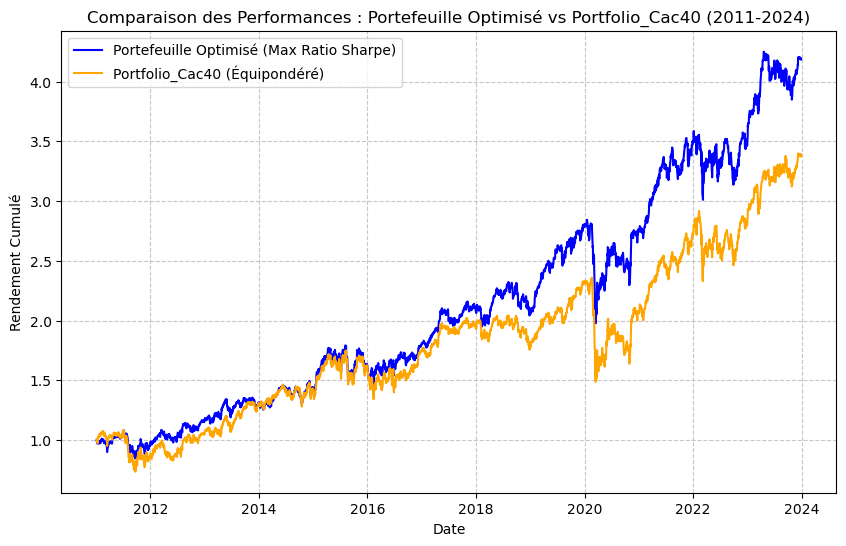

Portfolio_Cac40 (Équipondéré) :
  - Rendement Total: 237.76%
  - Rendement Annualisé: 11.36%
  - Volatilité Annualisée: 20.64%
  - Ratio de Sharpe: 0.55

Portefeuille Optimisé :
  - Rendement Total: 319.17%
  - Rendement Annualisé: 12.50%
  - Volatilité Annualisée: 18.09%
  - Ratio de Sharpe: 0.69


In [57]:
# Tracer les performances cumulées des deux portefeuilles
plt.figure(figsize=(10, 6))
plt.plot(portfolio_optimized_cumulative_returns, label='Portefeuille Optimisé (Max Ratio Sharpe)', color='blue')
plt.plot(portfolio_cac40_cumulative_returns, label='Portfolio_Cac40 (Équipondéré)', color='orange')
plt.title('Comparaison des Performances : Portefeuille Optimisé vs Portfolio_Cac40 (2011-2024)')
plt.xlabel('Date')
plt.ylabel('Rendement Cumulé')
plt.legend()
plt.grid(True, linestyle ="--", alpha = 0.7)
plt.show()

# Statistiques de performance pour Portfolio_Cac40
total_return_cac40_portfolio = portfolio_cac40_cumulative_returns[-1] - 1
annualized_return_cac40_portfolio = portfolio_cac40_returns.mean() * 252
annualized_volatility_cac40_portfolio = portfolio_cac40_returns.std() * np.sqrt(252)
sharpe_ratio_cac40_portfolio = annualized_return_cac40_portfolio / annualized_volatility_cac40_portfolio

# Statistiques de performance pour le Portefeuille Optimisé
total_return_optimized_portfolio = portfolio_optimized_cumulative_returns[-1] - 1
annualized_return_optimized_portfolio = portfolio_optimized_returns.mean() * 252
annualized_volatility_optimized_portfolio = portfolio_optimized_returns.std() * np.sqrt(252)
sharpe_ratio_optimized_portfolio = annualized_return_optimized_portfolio / annualized_volatility_optimized_portfolio

print(f"Portfolio_Cac40 (Équipondéré) :")
print(f"  - Rendement Total: {total_return_cac40_portfolio:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_cac40_portfolio:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_cac40_portfolio:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_cac40_portfolio:.2f}")
print(f"\nPortefeuille Optimisé :")
print(f"  - Rendement Total: {total_return_optimized_portfolio:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_optimized_portfolio:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_optimized_portfolio:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_optimized_portfolio:.2f}")